# Projeto 1 - SME 0878


Giovanna Zolin Pinheiro Hayasida - n: 9762848 

Luna Wagner Cunha - n: 9762831 

Objetivo:Predizer o meio de transporte de usuários a partir de dados de celular.

2)Realize	o	pré-processamento	dos	dados:	Verifque	se	há	NaN	ou	outros	erros no	dados.	Selecione apenas	os	atributos	relevantes	e	numéricos.



In [6]:
#Importando pacotes
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

#Lendo o arquivo CSV com os dados
data = pd.read_csv('data.csv', header=(0))
#Retirando dados faltantes.
data=data.dropna()
#Retirando dados duplicados
data.duplicated()
data = data.drop_duplicates()
#Selecionando as classes, que estão na última coluna
#pd.unique - seleciona os nomes das diferentes classes sem que haja repetição.
import numpy as np
classes = pd.unique(data[data.columns[-1]])
classes = np.array(classes, dtype=str)

Exercicio 3: No	caso	do	classificador	Knn,	verifique	o	efeito	do	parâmetro	k	na	classificação

In [7]:
list_labels = list(data.columns)
#Selecionando a coluna contendo as classes e armazenando em Y.
Y = np.array(data[list_labels[-1]],dtype=str)
#Retirando a coluna com as classes e armazenando em X.
data= data.drop(list_labels[-1], axis = 1)

#Salvando o nome das características para uso posterior.
data_list = list(data.columns)

#Convertando num numpy array
X = np.array(data)

from sklearn.model_selection import train_test_split
import numpy as np
# p é a proporção do total dos dados para a amostra treino, e 1-p é para a amostra de teste.
p = 0.7
#selecionando as amostras de treino e teste 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42) #random_state eh a semente 
train_x

array([[225.        ,   9.89936913,   9.40669852, ...,  84.68325639,
         84.68325639,   0.36117196],
       [  9.        ,   9.79432635,   7.8907517 , ...,  89.74870697,
         89.74870697,   0.        ],
       [ 49.        ,  10.78024708,   7.06036091, ...,  89.7537947 ,
         89.7537947 ,   1.02319091],
       ...,
       [ 53.        ,   9.78547201,   9.43017723, ...,   0.        ,
          0.        ,   0.        ],
       [ 12.        ,   9.98517065,   5.11123388, ...,   0.        ,
          0.        ,   0.        ],
       [305.        ,   9.94344281,   9.90558066, ...,  85.27839966,
         85.27839966,   2.09944143]])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
#Treinando o modelo usando as amostras de treino
model.fit(train_x,train_y)

#Predict Output
pred_y= model.predict(test_x)

from sklearn.metrics import accuracy_score
score = accuracy_score(pred_y, test_y)
print('Accuracy:', score)

Accuracy: 0.5955882352941176


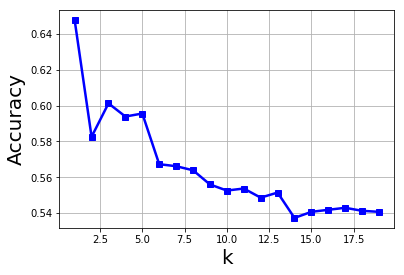

In [9]:
#Vetores vazios para armazenar os dados que serão gerados no for
vscore = []
vk = []
#Variando o número de vizinhos mais próximos k, e aplicando no classificador. 
for k in np.arange(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    # Treinando o classificador usando as amostras de testes
    model.fit(train_x,train_y)
    #Fazendo a predição usando a amostra de teste
    pred_y= model.predict(test_x) 
    #Obtendo a acurácia, que compara a classificação gerada com a real classificação da amostra de teste.
    score = accuracy_score(pred_y, test_y)
    vscore.append(score)
    vk.append(k)
#Plotando os resultados gerados de acurácia e K's.
plt.plot(vk, vscore, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.show(True)

Como é possível ver no gráfico acima, a melhor classificação foi feita com K=1, isso se baseia na maior acurácia em relação aos outros K's.

4	– Compare	os	classificadores:
• knn (melhor	k	observado	no	item	anterior)
• Naive	Bayes
• Decisão	Bayesiana

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
k = 1
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(train_x,train_y)
  #Fazendo a predição usando a amostra de teste
pred_y= model.predict(test_x)
 #Obtendo a acurácia, que compara a classificação gerada com a real classificação da amostra de teste.
from sklearn.metrics import accuracy_score
score_k = accuracy_score(pred_y, test_y)
print('Accuracy:', score_k)

Accuracy: 0.6476244343891403


In [11]:
#Classificador de BAYES              
from scipy.stats import multivariate_normal
P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns = classes) #matrix to store the probabilities
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(train_y == classes[i]))
    Z = train_x[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,test_x.shape[0]):
        x = test_x[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv)
        P[classes[i]][j] = pj

In [12]:
#Fazendo a predição usando a amostra de teste
pred_y = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, test_x.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    pred_y.append(classes[c])
pred_y = np.array(pred_y, dtype=str)
from sklearn.metrics import accuracy_score
score_c = accuracy_score(pred_y, test_y)
print('Accuracy:', score_c)

Accuracy: 0.6029411764705882


In [13]:
#Classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
#Fazendo a Predição
pred_y= gnb.predict(test_x)
score_n= accuracy_score(pred_y, test_y)
print('Accuracy:', score_n)

Accuracy: 0.5576923076923077


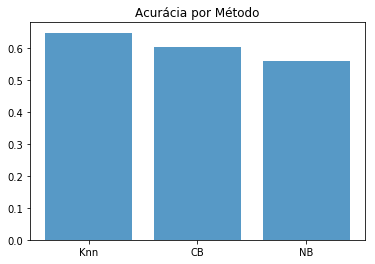

In [14]:
acura = [score_k, score_c, score_n]
nomes = ['Knn', 'CB', 'NB']
numbers = np.arange(0, len(nomes))
plt.bar(numbers, acura, alpha=.75)
plt.xticks(numbers, nomes)
plt.title('Acurácia por Método')
plt.show(True)

Comparando as acurácias não encontramos uma grande diferençã entre elas, mas o método Knn com k=1 obteve o melhor resultado

5	– Verifique	o	efeito	da	normalização (atributos	com	média	0	e	variância	1)	e	padronização (atributos	em	[0,1])	dos	dados.	Compare	os	casos	sem	processamento,	com	padronização	e	com	normalização	para	os	classificadores:
• knn	(melhor	k	observado	no	item	anterior)
• Naive	Bayes
• Decisão	Bayesiana

In [15]:
#Funcao que aplica os três classificadores de uma só vez;
def clas(X,Y):
    p = 0.7
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    ##KNN
    k = 1
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y_1= model.predict(test_x) 
    score_1 = accuracy_score(pred_y_1, test_y)
    
    ##CB
    P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns = classes) #matrix to store the probabilities
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    pred_y_2 = []
    #np.array(test_x.shape[0], dtype=str)
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y_2.append(classes[c])
    pred_y_2 = np.array(pred_y_2, dtype=str)
    score_2 = accuracy_score(pred_y_2, test_y)

    ##NB
    gnb = GaussianNB()
    gnb.fit(train_x,train_y)
    pred_y_3= gnb.predict(test_x)
    score_3 = accuracy_score(pred_y_3, test_y)
    return score_1, score_2, score_3

In [16]:
#Os dados foram lidos novamente, e em seguida padronizados, ou seja, transformados para pertencer a escala de 0 e 1.
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
# CSV file
data = pd.read_csv('data.csv', header=(0))
#print(data.shape)
#data.head(25)
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

#Fazendo a padronização
from sklearn.metrics import accuracy_score
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)

from sklearn.preprocessing import MinMaxScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = MinMaxScaler(feature_range=(0, 1))
X_pad = scaler.fit_transform(X)



In [17]:
score_1,score_2,score_3= clas(X_pad,Y)
print(score_1, score_2, score_3)

0.8076923076923077 0.6029411764705882 0.5576923076923077


In [21]:
#Os dados foram lidos novamente e normalizados, ou seja, os dados ficaram com média 0 e variância 1 como numa Normal Padrão.
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
# CSV file
data = pd.read_csv('data.csv', header=(0))
#print(data.shape)
#data.head(25)
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

#Fazendo a normalização
from sklearn.metrics import accuracy_score
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)

from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)




In [22]:
score_1_norm, score_2_norm, score_3_norm = clas(rescaledX,Y)
print(score_1_norm, score_2_norm, score_3_norm)

0.8433257918552036 0.6029411764705882 0.5576923076923077


In [26]:
#Os dados foram lidos novamente e não foram processados, para analisar o caso sem processamento. 
import pandas as pd
import matplotlib.pyplot as plt
# CSV file
data = pd.read_csv('data.csv', header=(0))
#print(data.shape)
#data.head(25)
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

#Sem processamento
from sklearn.metrics import accuracy_score
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)
# Remove the labels from the features
# axis 1 refers to the columns
data= data.drop(list_labels[-1], axis = 1)
# Saving feature names for later use
data_list = list(data.columns)
# Convert to numpy array
X = np.array(data)




In [27]:
score_1sem, score_2sem, score_3sem=clas(X,Y)
print(score_1sem, score_2sem, score_3sem)

0.6476244343891403 0.6029411764705882 0.5576923076923077


In [28]:
print("Acurácia do Knn, Bayes, NB com padronização:",score_1, score_2, score_3)
print("Acurácia do Knn, Bayes, NB com normalização:",score_1_norm, score_2_norm, score_3_norm)
print("Acurácia do Knn, Bayes, NB sem processamento:",score_1sem, score_2sem, score_3sem)

Acurácia do Knn, Bayes, NB com padronização: 0.8076923076923077 0.6029411764705882 0.5576923076923077
Acurácia do Knn, Bayes, NB com normalização: 0.8433257918552036 0.6029411764705882 0.5576923076923077
Acurácia do Knn, Bayes, NB sem processamento: 0.6476244343891403 0.6029411764705882 0.5576923076923077


No caso do classificador Knn, a normalização ajudou no aumento da acurácia. A padronização também teve uma acurácia elevada em comparação ao caso sem processamento. 
No caso do classificador Bayesiano e Naive Bayes, a acurácia não mudou para nenhum dos casos. Mas pode-se concluir que o classificador Bayesiano foi mais eficiente em relação ao outro.
Dessa forma, a maior acurácia foi obtida com o classificador Knn, que obteve melhores resultados, e com a normalização dos dados.

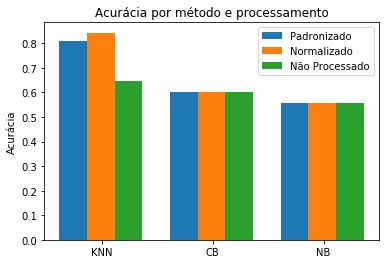

In [55]:
numbers = 3
acura = [score_1, score_2, score_3]
acura1 = [score_1_norm, score_2_norm, score_3_norm]
acura2 = [score_1sem, score_2sem, score_3sem]

ind = np.arange(numbers) 
width = 0.25       
plt.bar(ind-width, acura, width, label='Padronizado')
plt.bar(ind, acura1, width,label='Normalizado')
plt.bar(ind+ width, acura2, width, label='Não Processado')



plt.ylabel('Acurácia')
plt.title('Acurácia por método e processamento')

plt.xticks(ind + width/20  , ('KNN', 'CB', 'NB'))
plt.legend(loc='best')
plt.show()

Para o método de KNN tanto a padronização quanto a normalização dos dados aumentaram a acurácia da classificação, atingindo seu máximo com a normalização em 0.8433257918552036. Para os outros métodos de classificação não houve mudanças na acurácia para os diferentes métodos de processamento. 

6	– Mostre	a	matriz	de	correlação	entre	os	atributos.	Considere	os	atributos	com	 menor	correlação	(por	exemplo,	menor	do	que	0.5).	Realize	a	classificação	novamente	apenas	com	esses	atributos.	A	acurácia	melhora?

In [107]:
#Os dados foram lidos novamente e não foram processados, para analisar o caso sem processamento. 
import pandas as pd
import matplotlib.pyplot as plt
# CSV file
data = pd.read_csv('data.csv', header=(0))
#print(data.shape)
#data.head(25)
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

#Sem processamento
from sklearn.metrics import accuracy_score
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)
# Remove the labels from the features
# axis 1 refers to the columns
data= data.drop(list_labels[-1], axis = 1)
# Saving feature names for later use
data_list = list(data.columns)
# Convert to numpy array
X = np.array(data)

score_1, score_2, score_3 = clas(X,Y)

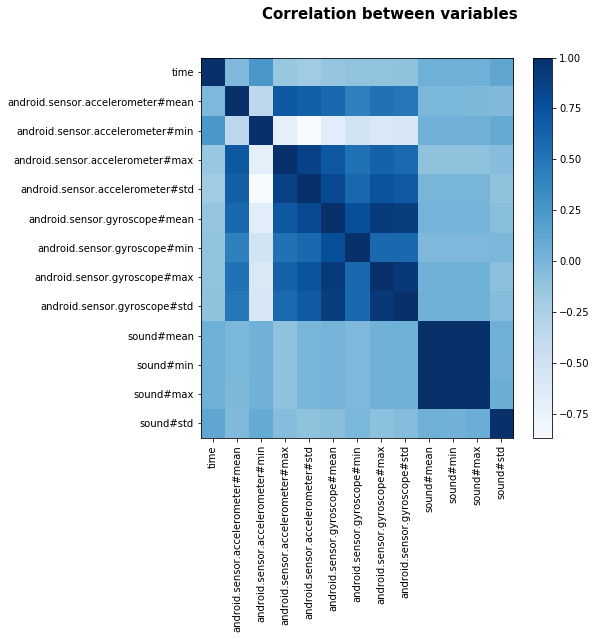

In [108]:
#Plot da matriz de correlação usando matplotlib.
import matplotlib.pyplot as plt
corr = data.corr()   #correlação dos dados 
plt.figure(figsize=(7, 7))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [109]:
#Selecionando os atributos com menor correlação. Considerou correlações menores que 0.6.
p = 0.6
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) < p:
                var.append([i,j])
print('Variáveis nao correlacionadas:\n', var)


Variáveis nao correlacionadas:
 [['time', 'android.sensor.accelerometer#mean'], ['time', 'android.sensor.accelerometer#min'], ['time', 'android.sensor.accelerometer#max'], ['time', 'android.sensor.accelerometer#std'], ['time', 'android.sensor.gyroscope#mean'], ['time', 'android.sensor.gyroscope#min'], ['time', 'android.sensor.gyroscope#max'], ['time', 'android.sensor.gyroscope#std'], ['time', 'sound#mean'], ['time', 'sound#min'], ['time', 'sound#max'], ['time', 'sound#std'], ['android.sensor.accelerometer#mean', 'time'], ['android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#mean'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#min'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#max'], ['android.sensor.accelerometer#mean', 'android.sensor.gyroscope#std'], ['android.sensor.accelerometer#mean', 'sound#mean'], ['android.sensor.accelerometer#mean', 'sound#min'], ['androi

In [110]:
#Selecionando os atributos sem que haja repetição.
var = np.unique(var)
var

array(['android.sensor.accelerometer#max',
       'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#std', 'android.sensor.gyroscope#max',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#std', 'sound#max', 'sound#mean',
       'sound#min', 'sound#std', 'time'], dtype='<U33')

In [116]:
#Lendo os dados novamente 
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
# Lendo arquivo CSV
data = pd.read_csv('data.csv', header=(0))
#Fazendo pré-processamento
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
#Selecionando as classes
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)
#list_labels = list(var)
Y = np.array(data[data.columns[-1]],dtype=str)
# transformando a variável var (contendo os nomes dos atributos menos correlacionados) em lista
data_list = list(var)
# Convertendo em numpy array. Nesse caso, X contém apenas os atirbutos de interesse.
X_sem = data.loc[:,['android.sensor.accelerometer#max','android.sensor.accelerometer#mean','android.sensor.accelerometer#min', 'android.sensor.accelerometer#std','android.sensor.gyroscope#max', 'android.sensor.gyroscope#mean','android.sensor.gyroscope#min', 'android.sensor.gyroscope#std','sound#max', 'sound#mean','sound#min', 'sound#std', 'time']]
X_sem = np.array(X_sem)

#Classificando
score_1sem, score_2sem, score_3sem = clas(X_sem,Y)
print(score_1sem, score_2sem, score_3sem)
print(score_1, score_2, score_3)

0.6476244343891403 0.6029411764705882 0.5576923076923077
0.6476244343891403 0.6029411764705882 0.5576923076923077


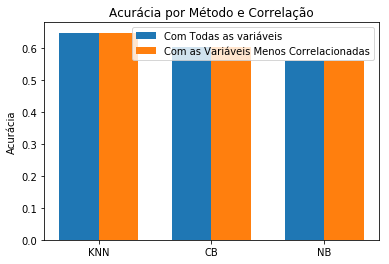

In [113]:
#Para efeitos de comparação, foi gerado o gráfico das acurácias considerando todos os atributos e 
#considerando os atributos menos correlacionados.
numbers = 3
acura1 = [score_1sem, score_2sem, score_3sem]
acura2 = [score_1, score_2, score_3]

ind = np.arange(numbers) 
width = 0.35       
plt.bar(ind, acura1, width,label='Com Todas as variáveis')
plt.bar(ind+ width, acura2, width, label='Com as Variáveis Menos Correlacionadas')



plt.ylabel('Acurácia')
plt.title('Acurácia por Método e Correlação')

plt.xticks(ind + width/2  , ('KNN', 'CB', 'NB'))
plt.legend(loc='best')
plt.show()

Podemos ver pelo gráfico que não houve alteração na acurácia quando tiramos as variáveis correlacionadas. Então poderíamos trabalhar apenas com essas variáveis não correlacionadas. 

7	– Verifique	qual	dos	classificadores	é	mais	robusto	com	relação	à	presença	de	ruídos.	Para	isso:	
• Aplique	a	normalização	dos	dados	para	que	os	atributos	apresentem	média	igual	a	zero	e	variância	igual	a	1.

• Inclua	em	X%	dos	atributos,	um	valor	normalmente	distribuído	com	média	zero	e	variância	1.	Considere	toda a	matriz	dos	dados,	sorteando	uma	posição	da	matriz	de	forma	aleatória.

• Varie	o	nível	de	ruído,	de	0	a	50%	(em	passos	de	5%)	e	avalie	como	muda	a	classificação.	Construa	um	gráfico	de	X% de	ruído versus	porcentagem	de	classificação	correta.	Coloque	a	média	e	o	desvio	padrão	calculados	a	partir	de	ao	menos	10	simulações.	Considere	70%	dos	dados	no	conjunto	de	treinamento.

• Discuta os	resultados

In [23]:
#Lendo e filtrando os dados 
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
# CSV file
data = pd.read_csv('tmd-dataset-5-seconds-sliding-window/carros.csv', header=(0))
#data = pd.read_csv('data.csv', header=(0))
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

In [24]:
#Normalizando
from sklearn.metrics import accuracy_score
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)

from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
X.shape

(5893, 13)

In [27]:
#Criando vetores para armezenar os valores das acurácias de cada método com a variação de ruído
ack=[]
accb=[]
acnb=[]
D = rescaledX
for p in np.arange(0,55,5):
    n = (p/100)*len(rescaledX) 
    ##Gerando valores de uma normal(0,1)
    Z=normal=np.random.normal(0,1,int(n))
    m=len(Z)
    #Substituindo os valores na matriz X em posições aleatórias
    for k in np.arange(0,m):
        i=np.random.randint(0,len(X),1)
        j=np.random.randint(0,13,1)
        D[i,j]=Z[k]
    ac1,ac2,ac3 = clas(D,Y)
    ack.append(round(ac1,3))
    accb.append(round(ac2,3))
    acnb.append(round(ac3,3))
    print(p,ack,accb,acnb,len(Z))

0 [0.843] [0.603] [0.558] 0
5 [0.843, 0.829] [0.603, 0.573] [0.558, 0.553] 294
10 [0.843, 0.829, 0.808] [0.603, 0.573, 0.583] [0.558, 0.553, 0.545] 589
15 [0.843, 0.829, 0.808, 0.785] [0.603, 0.573, 0.583, 0.582] [0.558, 0.553, 0.545, 0.538] 883
20 [0.843, 0.829, 0.808, 0.785, 0.751] [0.603, 0.573, 0.583, 0.582, 0.546] [0.558, 0.553, 0.545, 0.538, 0.524] 1178
25 [0.843, 0.829, 0.808, 0.785, 0.751, 0.707] [0.603, 0.573, 0.583, 0.582, 0.546, 0.541] [0.558, 0.553, 0.545, 0.538, 0.524, 0.52] 1473
30 [0.843, 0.829, 0.808, 0.785, 0.751, 0.707, 0.663] [0.603, 0.573, 0.583, 0.582, 0.546, 0.541, 0.52] [0.558, 0.553, 0.545, 0.538, 0.524, 0.52, 0.507] 1767
35 [0.843, 0.829, 0.808, 0.785, 0.751, 0.707, 0.663, 0.619] [0.603, 0.573, 0.583, 0.582, 0.546, 0.541, 0.52, 0.52] [0.558, 0.553, 0.545, 0.538, 0.524, 0.52, 0.507, 0.501] 2062
40 [0.843, 0.829, 0.808, 0.785, 0.751, 0.707, 0.663, 0.619, 0.585] [0.603, 0.573, 0.583, 0.582, 0.546, 0.541, 0.52, 0.52, 0.494] [0.558, 0.553, 0.545, 0.538, 0.524, 0.52,

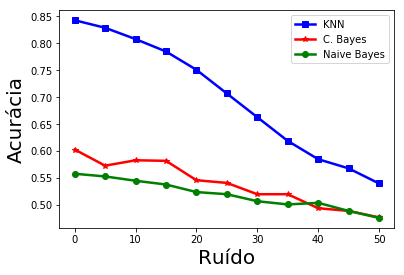

In [29]:
##Gráfico que mostra as acurácias dos métodos pra cada porcentagem de ruído
import matplotlib.pyplot as plt
x = np.arange(0,55,5)
y = ack
z = accb
v = acnb
plt.plot(x, y, marker='s', linestyle='-', color="blue", linewidth=2.5, label='KNN')
plt.plot(x, z, marker='*', linestyle='-', color="red", linewidth=2.5, label='C. Bayes')
plt.plot(x, v, marker='o', linestyle='-', color="green", linewidth=2.5, label='Naive Bayes')

plt.xlabel("Ruído", fontsize=20)
plt.ylabel("Acurácia", fontsize=20)
plt.legend()
plt.show(True)

Podemos perceber que a acurácia dos 3 métodos de classificação decresce com o aumento no nível de ruídos. O método KNN possui a maior inclinação. 

8	– No	caso	do	classificador	Naive	Bayes,	é	possível	considerar	diferentes	funções	para	estimar	as	probabilidades.	Compare	os	casos:	(i)	Gaussian	Naive	Bayes,	(ii)	multinomial	Naive	Bayes e	(iii) Bernoulli	Naive	Bayes.	Considere	os	casos	com	e	sem	padronização.

In [123]:
#Caso com padronização: lendo os dados e padronizando.
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
# CSV file
data = pd.read_csv('data.csv', header=(0))
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()

import numpy as np
classes = pd.unique(data[data.columns[-1]]) 
classes = np.array(classes, dtype=str)

list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)
data= data.drop(list_labels[-1], axis = 1)
data_list = list(data.columns)
# numpy array
X = np.array(data)

# padronizacao 
from sklearn.preprocessing import MinMaxScaler
X_stan = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = MinMaxScaler(feature_range=(0, 1))
X_pad= scaler.fit_transform(X)

#Amostras de teste e treino
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X_pad, Y, test_size = 1-p, random_state = 42)

#I)Gaussian Bayes
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
pred_y= gnb.predict(test_x)
score_gaussian= accuracy_score(pred_y, test_y)

#II)Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_x,train_y)
pred_y_multi = mnb.predict(test_x)
score_multi = accuracy_score(pred_y_multi,test_y)

#III)Bernoulli	Naive	Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_x,train_y)
pred_y_bern = mnb.predict(test_x)
score_bern = accuracy_score(pred_y_bern,test_y)

print("Accuracy of Gaussian, Multinomial and Bernoulli: %f , %f , %f" % (score_gaussian, score_multi, score_bern))

Accuracy of Gaussian, Multinomial and Bernoulli: 0.557692 , 0.525452 , 0.525452


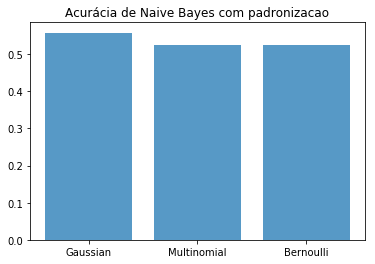

In [124]:
acura = [score_gaussian, score_multi, score_bern]
nomes = ['Gaussian', 'Multinomial', 'Bernoulli']
numbers = np.arange(0, len(nomes))
plt.bar(numbers, acura, alpha=.75)
plt.xticks(numbers, nomes)
plt.title('Acurácia de Naive Bayes com padronizacao')
plt.show(True)

In [125]:
#Sem padronizacao
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)
data= data.drop(list_labels[-1], axis = 1)
# Saving feature names for later use
data_list = list(data.columns)
# Convert to numpy array
X = np.array(data)
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
#I)Gaussian Bayes
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
pred_y= gnb.predict(test_x)
score_gaussian= accuracy_score(pred_y, test_y)

#II)multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_x,train_y)
pred_y_multi = mnb.predict(test_x)
score_multi = accuracy_score(pred_y_multi,test_y)

#III)Bernoulli	Naive	Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_x,train_y)
pred_y_bern = mnb.predict(test_x)
score_bern = accuracy_score(pred_y_bern,test_y)

print("Accuracy of Gaussian, Multinomial and Bernoulli: %f , %f , %f" % (score_gaussian, score_multi, score_bern))

Accuracy of Gaussian, Multinomial and Bernoulli: 0.429299 , 0.158371 , 0.158371


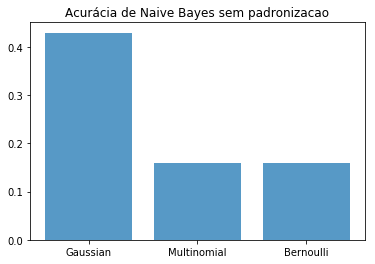

In [126]:
acura = [score_gaussian, score_multi, score_bern]
nomes = ['Gaussian', 'Multinomial', 'Bernoulli']
numbers = np.arange(0, len(nomes))
plt.bar(numbers, acura, alpha=.75)
plt.xticks(numbers, nomes)
plt.title('Acurácia de Naive Bayes sem padronizacao')
plt.show(True)

A acurácia para todas as variações do Naive Bayes foi maior para o caso com padronização, todas as acurácias ultrapassaram 0.5. Por outro lado, no caso sem padronização, a acurácia foi bem menor para o Naive Multinomial e o Bernoulli atingindo 0.15, e no caso Gaussiano atingindo aproximadamente 0.43.

9: No	caso	do	Knn,	compare	as	classificações	usando	diferentes	métricas.	Varie	k	e	mostre	as	curvas	(em	um	mesmo	plot)	para	as	distâncias	euclidiana,	Manhattan,	Chebyshev e	Minkowsky	(p=0.5,	p=1.5,	p=3).

In [129]:
#Importando e pré-processando os dados.
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data.csv', header=(0))
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()


classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)
data= data.drop(list_labels[-1], axis = 1)
data_list = list(data.columns)
X = np.array(data)

import numpy as np
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42) #random_state eh a semente 

vscore = []
vk = []
vscore2 = []
vk2 = []
vscore3  = []
vk3=[]
vscore4 = []
vk4 = []
vscore5 = []
vk5 = []
vscore6 = []
vk6 = []
#Distância Euclidiana
for k in np.arange(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y= model.predict(test_x) 
    score = accuracy_score(pred_y, test_y)
    vscore.append(score)
    vk.append(k) 
    
#Distância Manhattan
for k in np.arange(1, 20):
    model2 = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    # Train the model using the training sets
    model2.fit(train_x,train_y)
    #Predict Output
    pred_y2= model2.predict(test_x) 
    score2 = accuracy_score(pred_y2, test_y)
    vscore2.append(score2)
    vk2.append(k)

#Distância de Chebyshev
for k in np.arange(1, 20):
    model3 = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev')
    # Train the model using the training sets
    model3.fit(train_x,train_y)
    #Predict Output
    pred_y3= model3.predict(test_x) 
    score3 = accuracy_score(pred_y3, test_y)
    vscore3.append(score3)
    vk3.append(k)

#Distância de Minkowski com p=1.5
for k in np.arange(1, 20):
    model5 = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski',p=1.5)
    # Train the model using the training sets
    model5.fit(train_x,train_y)
    #Predict Output
    pred_y5= model5.predict(test_x) # 0:Overcast, 2:Mild
    score5 = accuracy_score(pred_y5, test_y)
    vscore5.append(score5)
    vk5.append(k)
    
#Distância de Minkowski com p=3 
for k in np.arange(1, 20):
    model6 = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski',p=3)
    # Train the model using the training sets
    model6.fit(train_x,train_y)
    #Predict Output
    pred_y6= model6.predict(test_x) 
    score6 = accuracy_score(pred_y6, test_y)
    vscore6.append(score6)
    vk6.append(k)


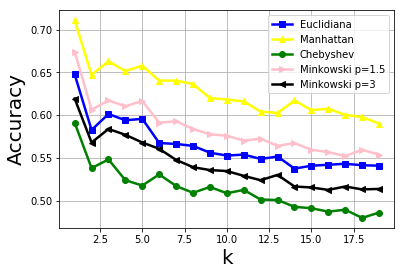

In [130]:
import matplotlib.pyplot as plt
plt.plot(vk, vscore, marker='s', linestyle='-', color="blue", linewidth=2.5)#, label = 'Euclidiana'
plt.plot(vk2, vscore2, marker='^', linestyle='-', color="yellow", linewidth=2.5)#, label = 'Manhattan'
plt.plot(vk3, vscore3, marker='o', linestyle='-', color="green", linewidth=2.5)#, label = 'Chebyshev'
plt.plot(vk5, vscore5, marker='>', linestyle='-', color="pink", linewidth=2.5)#, label = 'Minkowski p=1.5'
plt.plot(vk6, vscore6, marker='<', linestyle='-', color="black", linewidth=2.5)#, label = 'Minkowski p=3'
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.gca().legend(('Euclidiana','Manhattan', 'Chebyshev','Minkowski p=1.5','Minkowski p=3'))
plt.grid(True)
plt.show(True) 

Para diferentes valores de K, o usa da distância de Manhattan no classificador Knn obteve melhores resultados, seguido das distâncias de Minkowski (p=1.5), Euclidiana, Minkowski (p=3) e Chebyshev.

10	– Faça	um	gráfico	da	fração	de	elementos	no	conjunto	de	treinamento	(10% até	90%	em	passos	de	10%)	versus	acurácia	para	os	classificadores:
• knn	(melhor	k	observado	anteriormente)
• Naive	Bayes
• Decisão	Bayesiana
Considere	os	casos	com	e	sem	padronização.

In [131]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB

#Funcao de Classificação com p variável
def clasf(X,Y,p):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    ##KNN
    k = 1
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # Treinamento
    model.fit(train_x,train_y)
    #Predição
    pred_y_1= model.predict(test_x) 
    score_1 = accuracy_score(pred_y_1, test_y)
    
    ##Classificador Bayesiano
    P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns = classes) #matrix to store the probabilities
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    pred_y_2 = []
    #np.array(test_x.shape[0], dtype=str)
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y_2.append(classes[c])
    pred_y_2 = np.array(pred_y_2, dtype=str)
    score_2 = accuracy_score(pred_y_2, test_y)

    ##Classificador Naive Bayes
    gnb = GaussianNB()
    gnb.fit(train_x,train_y)
    pred_y_3= gnb.predict(test_x)
    score_3 = accuracy_score(pred_y_3, test_y)
    return score_1, score_2, score_3


In [132]:
#Importando os dados
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv', header=(0))
#data = pd.read_csv('data.csv', header=(0))
data=data.dropna()
data.duplicated()
data = data.drop_duplicates()

import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)
data= data.drop(list_labels[-1], axis = 1)

# Nomes dos atributos
data_list = list(data.columns)

#numpy array
X = np.array(data)

In [133]:
###Sem Padronização
#vetores vazios para as acuracias do knn, bayesiano e naiva bayes
ack_2=[]
accb_2=[]
acnb_2=[]

#for com p variando de 0.6 a 0.9 com acrescimo de 0.1, chamando a função anterior para a classificação por diferentes métodos.
for p in np.arange(0.6,0.91,0.1):
    ac1,ac2,ac3=clasf(X,Y,p)
    ack_2.append(round(ac1,3))
    accb_2.append(round(ac2,3))
    acnb_2.append(round(ac3,3))
    print(p,ack_2,accb_2,acnb_2)

0.6 [0.645] [0.588] [0.556]
0.7 [0.645, 0.648] [0.588, 0.603] [0.556, 0.558]
0.7999999999999999 [0.645, 0.648, 0.64] [0.588, 0.603, 0.628] [0.556, 0.558, 0.57]
0.8999999999999999 [0.645, 0.648, 0.64, 0.659] [0.588, 0.603, 0.628, 0.624] [0.556, 0.558, 0.57, 0.581]


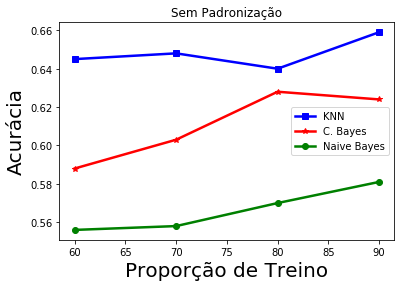

In [134]:
import matplotlib.pyplot as plt
x = np.arange(60,100,10)
y = ack_2
z = accb_2
v = acnb_2
plt.plot(x, y, marker='s', linestyle='-', color="blue", linewidth=2.5, label='KNN')
plt.plot(x, z, marker='*', linestyle='-', color="red", linewidth=2.5, label='C. Bayes')
plt.plot(x, v, marker='o', linestyle='-', color="green", linewidth=2.5, label='Naive Bayes')

plt.title("Sem Padronização")
plt.xlabel("Proporção de Treino", fontsize=20)
plt.ylabel("Acurácia", fontsize=20)
plt.legend()
plt.show(True)

Para diferentes valores de p e dados não padronizados, o Knn não variou muito, ficando na faixa de acurácia entre 0.64 e 0.66. Já o classificador Bayesiano, obteve maior acurácia com p = 0.8, atingindo 0.63 de acurácia, aproximadamente. E o Naive Bayes, resultou nas menores acurácias, variando entre 0.55 e 0.58.

In [136]:
#Lendo e pré-processando os dados novamente
import pandas as pd
import matplotlib.pyplot as plt
# CSV
data = pd.read_csv('data.csv', header=(0))
#data = pd.read_csv('data.csv', header=(0))

data=data.dropna()
data.duplicated()
data = data.drop_duplicates()
import numpy as np
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str)

list_labels = list(data.columns)

In [137]:
#Padronizando os dados
from sklearn.metrics import accuracy_score
list_labels = list(data.columns)
Y = np.array(data[list_labels[-1]],dtype=str)

from sklearn.preprocessing import MinMaxScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
scaler = MinMaxScaler(feature_range=(0, 1))
X_pad = scaler.fit_transform(X)

In [138]:
## Aplicando a Classificação com a função de classificação com p variável
ack_2=[]
accb_2=[]
acnb_2=[]
#uso do for para aplicar a função com diferentes valores de p entre 0.6 e 0.9 com acréscimo de 0.1
for p in np.arange(0.6,0.9,0.1):
    ac1,ac2,ac3=clasf(X_pad,Y,p)
    ack_2.append(round(ac1,3))
    accb_2.append(round(ac2,3))
    acnb_2.append(round(ac3,3))
    print(p,ack_2,accb_2,acnb_2)

0.6 [0.797] [0.588] [0.556]
0.7 [0.797, 0.808] [0.588, 0.603] [0.556, 0.558]
0.7999999999999999 [0.797, 0.808, 0.817] [0.588, 0.603, 0.628] [0.556, 0.558, 0.57]
0.8999999999999999 [0.797, 0.808, 0.817, 0.81] [0.588, 0.603, 0.628, 0.624] [0.556, 0.558, 0.57, 0.581]


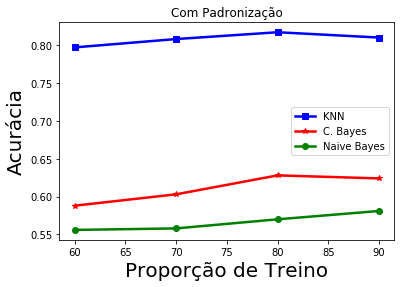

In [139]:
#Gerando o gráfico das acurácias dos métodos
import matplotlib.pyplot as plt
x = np.arange(60,100,10)
y = ack_2
z = accb_2
v = acnb_2
plt.plot(x, y, marker='s', linestyle='-', color="blue", linewidth=2.5, label='KNN')
plt.plot(x, z, marker='*', linestyle='-', color="red", linewidth=2.5, label='C. Bayes')
plt.plot(x, v, marker='o', linestyle='-', color="green", linewidth=2.5, label='Naive Bayes')

plt.title("Com Padronização")
plt.xlabel("Proporção de Treino", fontsize=20)
plt.ylabel("Acurácia", fontsize=20)
plt.legend()
plt.show(True)

Como já era esperado, o classificador KNN resultou numa melhor acurácia com os dados padronizados, ficando próxima de 0.8 em geral. Já os outros dois classificadores, tiveram resultados muito próximos.